![Julia](http://104.224.129.42/media/julia-logo.svg)

#### 一种科学计算的新尝试

## 没有银弹

**没有银弹: 软件工程的本质性与附属性工作** 是IBM大型机之父 Fred Brooks 所发表的一篇关于软件工程的经典论文。指没有任何一项技术或方法可以使软件工程的生产力在十年内提高十倍。

- **Python** 胶水，简单，灵活，生态丰富，好上手，...
- **MATLAB** 有大量历史积累，速度足够快，商业软件有充分支持，对矩阵计算支持好...
- **Fortran** 速度最快，有大量历史代码，...
- **C** 充分接近底层，几乎所有的硬件都支持，语法足够简单（容易制定标准），...
- **C++** 有大量工程实践，能够保证低抽象，工具丰富...


- **Python** 慢，作为胶水需要写大量胶水代码进行封装，...
- **MATLAB** 商业软件收费，不够工程化，...
- **Fortran** 过于古老，历史遗留问题多，生态不够好，没有包管理器 ...
- **C** 语法简单，缺乏足够的抽象能力 ...
- **C++** 开发效率低（某种程度上正是因为工具太丰富了），为了兼容有很多的妥协 ...


## 劣势往往是优势所带来的

## 科学计算的问题

简单来说是已有的工具对于新出现的问题不够好用，影响了效率。使用 `MATLAB` 难以开发大型的程序库（起初并非一般目的的编程语言），此外作为商业软件需要收费（很多学校和机构也只买了部分功能）。

而使用 `Python` 在 `Python` 层面的逻辑过多的时候，会有不能使用例如 `numba` 等特定加速器的情况，而一般的JIT编译器又由于Python本身的简单和动态性变得难以优化，例如 `Pyston`/`PyPy` ，于是需要用 `C/C++/Fortran/Cython` 重写，而后者的开发效率则要低很多。此外，进入了2010年之后，随着计算能力的提高，很多数值任务的计算量和复杂度都提高了，我们的模型越来越复杂，以至于在很多任务里性能是非常关键的，它或许直接决定了一个项目能否进行下去。

我们的问题是：是否能在科学计算，这个场景下在 `Python` 和 `C/C++/Fortran` 之间找到一个平衡点？让我们可以用**一种语言**开发和实践想法，在保证Python一般的开发效率的前提下，尽可能地提高性能。

### 实践中的需求

- 易用性：符合（数学）直觉（intuitive），代码易读，程序整体结构简单
- 性能：能够充分榨干计算资源的性能，overhead尽可能的小
- 描述能力：具有足够强大的抽象能力，使得代码干净无噪声（能够写出DRY的代码）
- 免费开源：如果你的collaborator没有license怎么办？

## Julia语言的特点

## 性能好

![](https://plot.ly/~Roger-luo/9.png?share_key=Lf91Q3vXngwR4BCCAxVHa2)

## 其它特点

- 可读性更好，更贴近数学表达式的代码
- 内建的包管理器
- 继承自Lisp的宏
- 为并行计算和分布式系统设计
- 协程：“绿色”的线程
- 从语言层面支持的GPU编程：JuliaGPU/CUDAnative

详见：[juliacn.com/julialang](http://juliacn.com/julialang/)

## 适用于科学计算

- 机器学习（内建的GPU编程，无缝调用Python，更快的native代码，etc.）
- 数据处理（支持HDF5和DataFrame，CSV等常用数据格式，自带分布式特性）
- 仿真模拟（自带多维数组和各类稀疏矩阵）
- 数值分析（高性能的代码和方便的并行计算）
- etc.

## 缺点

*这只是部分缺点，不存在没有坑的语言，没有坑只是你学的不到位*

- 基于JIT，启动有预热时间，不适合小规模，只运行一次的任务（例如shell脚本，这是几乎所有JIT编译器都会有的问题）
- 新语言的生态还不够强，不适合 **调库** 党（即便能使用所有Python和大部分R的库）
- CLI工具缺乏，不适合在终端（Terminal）开发，需要借助能够热重启（reload）和IDE开发

**micro-benchmark** 实际上很难说明问题，Julia官网的benchmark实际上也常常被指出不是按照某种语言特定的方式编写。但是举例而言，如果大家都比矩阵乘法 `gemm` ，没有任何意义，大家都是调 `mkl`/`openBLAS`。对于语言来讲，纯Julia编写的库更加有说服力


## 标准库和一些官方支持的库

- [StaticArrays.jl](https://github.com/JuliaArrays/StaticArrays.jl) 纯Julia实现的静态数组（更快的小型线性代数计算）
- [SparseArrays.jl](https://docs.julialang.org/en/latest/stdlib/SparseArrays/) 纯Julia实现的稀疏矩阵库（一些操作，例如kronecker乘积远超`scipy.sparse`）


以下是一些纯Julia的实践：

## 我们自己的实践

用Julia语言实现比同类 `Python` + `C++` 实现更快的量子线路模拟器：[Github/Yao.jl](https://github.com/QuantumBFS/Yao.jl)

## 一些其它的实践

- [TensorOperations.jl](https://github.com/Jutho/TensorOperations.jl) 比 `numpy.einsum` 快将近十倍的，语法更加自然的张量收缩
- [DifferentialEquations.jl](https://github.com/JuliaDiffEq/DifferentialEquations.jl) 性能更好，功能更加强大的偏微分方程求解器
- [CUDAnative.jl](https://github.com/JuliaGPU/CUDAnative.jl) 唯一一个在动态语言上支持CUDA编程的工具包
- [Knet.jl](https://github.com/denizyuret/Knet.jl) 纯Julia实现的深度学习框架
- [Turing.jl](https://github.com/TuringLang/Turing.jl) 纯Julia实现的统计推断语言（DSL）
- [JuMP.jl](https://github.com/JuliaOpt/JuMP.jl) 利用Julia实现的优化器DSL（Domain Specific Language）


延伸阅读：

1. [JuliaCon 2018: Why Julia is the most suitable language for science](https://www.youtube.com/watch?v=7y-ahkUsIrY) 科学计算软件开发者谈Julia语言
2. [Why numba and cython are not substitutes for Julia](http://www.stochasticlifestyle.com/why-numba-and-cython-are-not-substitutes-for-julia/) 从Julia社区的角度看Numba和cython
5. [Github/numba: #3814, Why Julia? Will Python/Numba and Python/Cython lose to Julia?](https://github.com/numba/numba/issues/3814) 从Numba社区的角度看Julia
3. [Why Julia work so well](https://ucidatascienceinitiative.github.io/IntroToJulia/Html/WhyJulia) 深入了解多重派发和Julia的类型系统
4. [为什么我们要创造Julia](https://julialang.org/blog/2012/02/why-we-created-julia-zh_CN) Julia最初的设想
6. [The Julia paper](https://arxiv.org/abs/1209.5145) 介绍了编程语言语义设计和优化的矛盾

## 如何安装和配置Julia开发环境

我推荐直接安装全家桶：Julia Pro：

https://shop.juliacomputing.com/Products/juliapro-2-2-2-2-2/

像Python一样，Julia可以通过从官网下载编译器安装：

https://julialang.org/downloads/

但是国内有些地区的速度可能较慢，所以我们也准备了境内的服务器：

http://juliacn.com/downloads/


## 如何获得帮助

- 查文档：官方文档（docs.julialang.org），中文文档（在建，juliacn.com）
- 搜索：Google 或者 Bing
- 论坛：https://discourse.julialang.org （英文）/ https://discourse.juliacn.com (中文)
- 知乎：搜索或者提问
- QQ群：316628299


## 安装jupyter notebook

我们这次主要使用jupyter notebook来展示Julia。Julia和jupyter都是开源组织NumFocus的项目，所以jupyter实际上来自于：Julia，Python，R的开头。除了jupyter notebook以外，你还可以使用：

- 在线的Julia环境：http://juliabox.com 
- 以及Atom上的Julia插件Juno
- Jetbrain平台上的Julia插件：https://plugins.jetbrains.com/plugin/10413-julia （千里冰封）
- VS code上的Julia插件


首先打开你的Julia交互式环境（REPL）：

- Linux用户请打开你的命令行，运行Julia的可执行文件：`你的Julia安装路径/julia`
- Mac用户请在app里找到Julia然后点击打开，或者如果下载了其它二进制版本的，也请打开命令行运行可执行文件
- Windows用户请在桌面/安装目录中找到Julia的快捷方式活着可执行文件，然后双击打开

然后按`]`键进入pkg模式：

```
(v1.0) pkg> add IJulia PyCall
```

`PyCall`的编译时间可能会比较久，不用着急，如果你之前没有安装过Python（或者Python不在标准路径里）那么它将会自动下载Python。

先别着急，在启动notebook之前，我们先了解一下Julia的REPL：

![](julia-repl.png)

我们可以按 `]` 键进入package模式来安装package

<img src="https://discourse.juliacn.com/uploads/default/original/1X/01e4b983dccf7311b78afdd76a65f9117411f444.gif"></img>

### 安装这个教程

本教程也是一个标准的Julia package，你可以直接通过Julia的包管理器下载（安装）这个教程到本地。**在pkg模式下**输入下面的指令

```julia
(v1.0) pkg> add https://github.com/Roger-luo/TutorialZH.jl.git
```

### 安装常用的package

有一些常用的package是非常推荐一开始就装好的，这包括以下的package，你可以选择性的安装：

- [Revise]() 代码热加载
- [Debugger]() 命令行断点和调试工具
- [IJulia]() Julia的jupyter notebook启动器 
- [PyPlot]() matplotlib的Julia封装，用于绘图
- [GR]() 一个基于C的轻量级绘图库

本教程会自动安装 **Revise**，**IJulia** 和 **GR**

### 养成查阅文档的好习惯

Julia官方文档是最权威，也是最标准的参考资料。你甚至可以直接通过阅读文档来学习Julia：

- 中文文档：[docs.juliacn.com](https://docs.juliacn.com)
- 英文文档：[docs.julialang.org](https://docs.julialang.org)

文档的左手边可以进行搜索

如果对什么有疑问，可以按`?`进入 `help` （帮助）模式来查看文档：

```
help?> julia
search:

  Welcome to Julia 0.7.0-beta2.33. The full manual is available at

  https://docs.julialang.org/

  as well as many great tutorials and learning resources:

  https://julialang.org/learning/

  For help on a specific function or macro, type ? followed by its name, e.g. ?cos, or
  ?@time, and press enter.
```

如果需要临时进入shell进行操作，按 `;` 可以进入 `shell` 模式：

```julia
shell> ls
Applications	Documents	Library		Music		Public
Desktop		Downloads	Movies		Pictures	test.jl
```

顺便一提，你还可以通过重载 `REPL` 模块里的方法创建个性的交互式界面，比如 `OhMyREPL`

![oh-my-repl](https://camo.githubusercontent.com/3cc1b639c8e0c129b419bb4727266cb56432241e/68747470733a2f2f692e696d6775722e636f6d2f777452304153442e706e67)

### 运行这个教程的示例程序

这个教程使用jupyter notebook编写，你可以在安装TutorialZH以后通过在REPL中输入

```julia
julia> using TutorialZH

julia> tutorial()
```

来打开这个notebook。

## 本次教程的目标

- 学会基本的语法（变量，控制流）
- 了解开发Julia的工具
- 了解一些常用的包和工具
- 了解宏和Julia编译器
- 了解如何编写高性能的Julia代码


## 基本语法

这一部分我们将简单地学习Julia的语法，包括它的字符串，变量，控制流还有函数的声明。

### Hello World

打印一个字符串非常简单，在Julia里类似于C语言，字符串使用双引号，而字符使用单引号。

In [1]:
println("Hello World!")

Hello World!


In [2]:
@show "Hello World!"

"Hello World!" = "Hello World!"


"Hello World!"

### 变量

你也可以绑定一个变量

In [3]:
x = "Hello World"

"Hello World"

变量名称不仅仅可以是ASCII字符，也可以是其它的Unicode字符，甚至是中文

In [4]:
你好 = "Hello!"
你好

"Hello!"

还可以是Emoji，输入 `\:smile` 然后再按 `tab`

In [5]:
😄 = "smile"

"smile"

还可以利用LaTeX来输入特别的数学符号，在notebook或者REPL里输入 `\` + `epsilon` 按 `tab` 键

In [6]:
ϵ = 2.2

2.2

Julia还利用了LLVM的一些常数（无限精度）：

In [7]:
π

π = 3.1415926535897...

## 任务一：对数组求和

我们定义一个求和函数 `sum(a)`，它会计算
$$
\mathrm{sum}(a) = \sum_{i=1}^n a_i,
$$
这里 $n$ 是 `a` 的长度。

#### 首先，我们来创建一个数组（Array）

下面这行代码创建了一个随机矩阵（二维数组），然后将它绑定到名字为 `A` 的变量上去

In [8]:
A = rand(10, 10)

10×10 Array{Float64,2}:
 0.306353  0.705611   0.690511   0.162836  …  0.67547    0.0236994  0.130676 
 0.980274  0.548541   0.88613    0.954211     0.706791   0.3126     0.612143 
 0.970238  0.375384   0.573854   0.246364     0.853297   0.603992   0.0405729
 0.309581  0.471756   0.0635857  0.532025     0.895417   0.555255   0.145271 
 0.333782  0.971056   0.988635   0.876698     0.162753   0.104283   0.803232 
 0.378345  0.0160126  0.599115   0.298105  …  0.718648   0.800233   0.376256 
 0.868365  0.888003   0.974723   0.576744     0.583315   0.0320234  0.0104292
 0.191297  0.394701   0.093314   0.975909     0.383071   0.466239   0.0353525
 0.685256  0.797699   0.545098   0.577594     0.0983902  0.746272   0.458692 
 0.609426  0.0695333  0.403478   0.832357     0.205592   0.113325   0.696338 

变量（Variable）：某个值的名字，以方便你保存这个值供后面使用。

如何创建一个随机向量（一维数组）？

In [9]:
A = rand(10)

10-element Array{Float64,1}:
 0.5046176465873373 
 0.686280492609177  
 0.00883023080236911
 0.3393977955457379 
 0.37235334019266575
 0.3604810116117827 
 0.5884644569401396 
 0.7653118933890426 
 0.7481748732825357 
 0.44608560248685203

参考资料：

- [Multidimensional Array](https://docs.julialang.org/en/v1/manual/arrays/)
- [中文文档：多维数组](https://docs.juliacn.com/latest/manual/arrays/)

### 函数声明

在Julia里我们使用 `function` 关键字声明一个函数，例如我们可以这样声明一个 `foo` 函数，它接收一个变量然后把它打印出来

```julia
function foo(x)
    println(x)
end
```

或者还有更加简介的声明方式，就像我们在数学表达式中定义函数一样

```julia
foo(x) = println(x)
```

In [10]:
function mysum(x)
    acc = 0
    for each in x
        acc += each
    end
    return acc
end

mysum (generic function with 1 method)

随机的数组求和不太容易检验，我们就对1到10的整数进行求和来看看结果对不对。如何声明1到10的整数呢？

方法一：构造一个都是零的一维数组，然后赋值

In [11]:
V = zeros(10)

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [12]:
for k in 1:10
    V[k] = k
end

V

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

方法二：列表推导（list comprehension）

这是Julia的一个语法糖（syntax sugar）可以让你写出更加简洁的代码，是我们鼓励的写法

In [13]:
V = [k for k in 1:10]

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [14]:
mysum(V)

55

对偶数角标求和：

In [15]:
is_even(x::Int) = x % 2 == 0

is_even (generic function with 1 method)

In [16]:
function sum_even(A)
    acc = 0.0
    for i in eachindex(A)
        if is_even(i)
            acc += A[i]
        end
    end
    return acc
end

sum_even(A)

2.5975567956425922

所有的Julia对象都有类型，当标注了类型而输入了错误的参数类型时就会报错。

In [17]:
is_even(2.0)

MethodError: MethodError: no method matching is_even(::Float64)
Closest candidates are:
  is_even(!Matched::Int64) at In[15]:1

最后让我们为 `is_even` 加上文档（文档是 `markdown` 格式，细则请参见文档：[英文](https://docs.julialang.org/en/latest/manual/documentation/)）

In [18]:
"""
    is_even(x::Int) -> Bool

判断一个整数 `x` 是否是偶数
"""
is_even

is_even

用 `@doc` 宏来查看或编辑文档，或者使用帮助模式（help mode）

In [19]:
?is_even

search: is_even



```
is_even(x::Int) -> Bool
```

判断一个整数 `x` 是否是偶数


你可能已经从以上打印的信息中注意到，Julia的所有变量都有 **类型（type）**，例如 `A` 这个随机数组是 `Array{Float64, 2}` 类型，意思是说一个二维的，元素类型为 `Float64` 的 `Array` 数组类型。我们往往使用类型来描述一个对象（object），例如

比如我们可以这样定义一个车子类型

```julia
struct Car end
```

下面我们来实现一个叫 `OneTo` 的类型

In [20]:
struct OneTo
    stop::Int
end

使得它传入 `mysum` 以后会从 `1` 加到 `stop`

构造一个类型需要实现构造器（constructor），Julia的每个类型都自带一个构造器。我们可以直接这样构造一个 `OneTo` 类型的实例（instance）

In [21]:
OneTo(10)

OneTo(10)

而对于这个类型，我们可以直接计算出结果，而不是进行for循环

$$
\frac{n (n + 1)}{2}
$$

In [22]:
mysum(x::OneTo) = x.stop * (x.stop + 1) ÷ 2

mysum (generic function with 2 methods)

In [23]:
mysum(OneTo(10))

55

在Julia里，我们有两个概念：generic function和method，每个函数名字定义了一个generic function，而每一种函数变量类型的组合定义了一个method。Julia会在你定义了一个method之后自动产生这个generic函数，然后给这个generic函数增加一个method。

所以当然你可以只声明一个generic函数

In [24]:
function foo end

foo (generic function with 0 methods)

我们上面定义的 `mysum` 作为一个generic函数拥有两个method，一个是非常general的用循环求和的实现，另外一个是针对 `OneTo` 的实现，但他们的意义都是一样的。

实际上不同于其它编程语言，Julia程序的设计采用所谓的 **面向方法的编程范式（method oriented programming）**，如果你想深入了解面向方法和面向对象的区别，可以阅读：[再谈Julia的编程范式](https://zhuanlan.zhihu.com/p/54957610)

但是问题来了，如果有两个实际意义不同但是名字相同的generic函数或者变量，亦或者是类型，如何区分他们呢？例如


对于文本文件，可以有 `readfile` 这个函数，但对于图片或者其它文件也可以有 `readfile` 这个函数，但是他们的实际实现是不同的，但输入的类型都是用 `String` 类型表示的地址

```julia
readfile("foo.txt")
```

和

```julia
readfile("foo.png")
```

Julia提供了模块（module）来进行名字空间的管理，你可以使用 **module** 关键字声明一个模块，上面的例子就可以变成

In [25]:
module PNGFile
   function readfile(path::String)
      println("read a png file")
   end
end

Main.PNGFile

In [26]:
module TextFile
   function readfile(path::String)
      println("read a text file")
   end
end

Main.TextFile

然后你就可以通过点操作符号，来访问不同函数

In [27]:
TextFile.readfile("foo.txt")

read a text file


In [28]:
PNGFile.readfile("foo.png")

read a png file


实际上所有的Julia程序都是在一个模块里。默认Julia代码存在于 `Main` 模块中，你可以通过 `@__MODULE__` 来获得当前的module

In [29]:
@__MODULE__

Main

有时候当我们确认命名没有冲突，或者只需要其中一个函数的时候。每次都写全模块全称很麻烦，所以我们可以使用 `import` 来导入一个模块的名称，例如

```julia
import TextFile: readfile
```

或者我们可以在模块内部标记默认会导出的命名

In [30]:
module TextFile
    export readfile
    function readfile(path::String)
      println("read a text file")
   end
end

module PNGFile
   export readfile
   function readfile(path::String)
      println("read a png file")
   end
end

Main.PNGFile

In [31]:
using .TextFile
readfile("foo.txt")

read a text file


这里 `.` 用于标记路径为当前module中的相对路径，它等价于 `using Main.TextFile` 

在编程语言中，我们常见的一个概念是作用域（scope），它决定了一个变量的可见区域。在Julia里作用域的结束一般使用 `end` 标记，开始由不同的关键字标记（ **function**, **begin**, **quote** 等等）

总体而言，Julia有两种作用域：

- 全局作用域（global scope）
- 局部作用域（local scope）

局部作用域可以互相嵌套，子作用域会继承父作用域的变量名，例如我们上面的 `mysum`

```julia
function mysum(x)
    s = 0
    for each in x
        s += each
    end
    return s
end
```

函数作用域和for循环中的作用域都是局部作用域，所以for循环会继承函数的作用域，使得我们可以在for循环中对s进行累加。

但，全局作用域不会被局部作用域继承，例如

In [32]:
a = 2

function foo()
    a += a + 1
    return a
end

foo()

UndefVarError: UndefVarError: a not defined

## 随机行走

**随机行走** （Random Walk）是在 **物理**，**金融**，**化学**，**生物** 等领域都会遇到的基本问题，我们这里将模拟最简单的一种：随机在一维坐标下行走。通过这个例子我们来了解基本的Julia程序编写过程。

In [33]:
"""
    walk(t) -> trajectory

模拟随机行走
"""
function walk(t)
    x = 0 # 初始位置
    trajectory = [x] # 初始化轨迹
    
    for t in 1:t
        if rand() < 0.5
            x += 1
        else
            x -= 1
        end
        push!(trajectory, x)
    end
    return trajectory
end

walk

In [34]:
?walk

search: walk walkdir showable iswritable



```
walk(t) -> trajectory
```

模拟随机行走


### 可视化

Julia有很多绘图库，这里我推荐 `GR` 模块，它的速度飞快，如果只是简单的绘图，使用 GR 最方便。当然你也可以使用官方推荐的 `Plots` 模块，它是一个提供了多种后端的绘图库。

┌ Info: Recompiling stale cache file /Users/roger/.julia/compiled/v1.1/Interact/XmYW4.ji for Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1184


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13805496773359067276\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2344970141879211649\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/2d0721f8d0c54f2ad4e5202e53a922d6ebb5c6cb-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-13805496773359067276\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

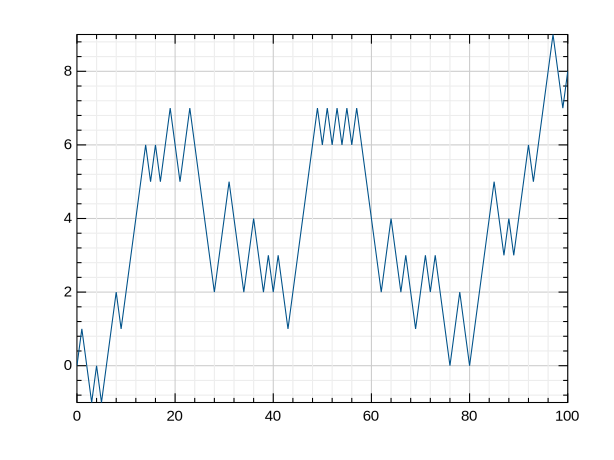

In [35]:
using GR, Interact

T = 100
plot(0:T, walk(T))

In [36]:
@manipulate for T in 10:100
    plot(0:T, walk(T))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-80a0ed20-d87f-49d5-96a0-2ff2ec0760a9", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["T"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>10,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
55, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/roger/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/roger/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/roger/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/Users/roger/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/Users/roger/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"77\",\"78\",\"79\",\"80\",\"81\",\"82\",\"83\",\"84\",\"85\",\"86\",\"87\",\"88\",\"89\",\"90\

### 存储数据

Julia 支持存储为空格或者其他符合分割的`dlm`格式，或者也可以存到 `csv` 格式，但是我更加推荐使用Julia自带的数据序列化工具 `JLD2`，JLD文件类型是基于一种高效的存储格式HDF5的，而 `JLD2` 是一个纯Julia实现的跨平台序列化工具，像Python的pickle一样，你可以将任何Julia对象存下来。

In [37]:
using JLD2

traj = walk(1000)

@save "data.jld2" traj

ArgumentError: ArgumentError: Package JLD2 not found in current path:
- Run `import Pkg; Pkg.add("JLD2")` to install the JLD2 package.


In [38]:
@load "data.jld2" traj
typeof(traj)

LoadError: UndefVarError: @load not defined

## Julia语言的编程范式

Julia里所有的一切都是对象，但是和面向对象语言围绕对象设计程序不同，Julia的程序设计以围绕method进行，我们称为method oriented programming。

## 定义一个复数类型

复数是很多数值计算和数据分析算法都会用到的类型，然而一般的处理器上并不是自带复数类型的，我们往往使用两倍精度的浮点数来模拟一个复数，例如在 `C` 语言里，双精度的复数可以写作：

```c
double _Complex a;
```

或者在 `C++` 中，双精度的复数可以写作：

```c++
std::complex<double> a;
```

在 `Python` 里，没有显示类型，但是我们可以使用 `j`：

```ipython
In [1]: 1 + 1.j
Out[1]: (1+1j)
```

而实际上和 `C`/`C++` 一样，Julia的复数类型也是纯Julia实现的，我们这里会简单地实现一个复数类型 `MyComplex`。Julia的类型使用 `struct` 关键字，然后用 `end` 表示这一段表达式的结束。每个Julia类型有一个默认的构造函数，这个构造函数的变量即为类型声明的成员。

In [39]:
struct MyComplex
    real::Float64
    imag::Float64
end

# 一个复数就是 MyComplex 类型的一个实例，也就是一种对象
a = MyComplex(1.0, 2.0)

MyComplex(1.0, 2.0)

In [40]:
a.real

1.0

In [41]:
a.imag

2.0

但是仅仅声明了类型还远远不够，我们还需要对复数定义复数运算，方便起见我们这里仅重载 `*` 算符：

$$
(a + b \cdot i) (c + d \cdot i) = (ac - bd) + (ad + bc)i
$$


首先我们需要将要重载的东西从 `Base` 模块中拿出来（而不是自己声明一个新的，为什么？留给大家之后思考），在Julia里，**运算符** 只是一种特殊的函数，并不会被特别对待

In [42]:
import Base: *

*(a::MyComplex, b::MyComplex) = MyComplex(a.real * b.real - a.imag * b.imag, a.real * b.imag + a.imag * b.real)

* (generic function with 433 methods)

In [43]:
b = MyComplex(1.0, 3.0)

a * b

MyComplex(-5.0, 5.0)

现在输出不是很好看，我们重载一下 `show` 方法把默认打印出来的字符串修改一下，这里字符串里的 `$` 是字符串插入，可以将一个Julia表达式的输出转换为字符串（ `String` 类型）然后插入到字符串里。

In [44]:
import Base: show

show(io::IO, ::MIME"text/plain", x::MyComplex) = print(io, "$(x.real) + $(x.imag)im")

show (generic function with 482 methods)

In [45]:
a * b

-5.0 + 5.0im

## 任意精度的复数类型

我们已经有了一个简单的复数类型，但是实际上真正在用的时候，我们可能会需要不同精度的复数类型，例如使用 `32`位浮点精度的复数类型。为了能够使用不同的复数类型，我们需要使用参数类型，而复数的实部和虚部都是实数，我们还需要限制其类型范围

In [46]:
struct MyComplex2{T <: Real}
    real::T
    imag::T
end

参数类型也有默认的构造函数

In [47]:
MyComplex2{Float32}(1.0f0, 2.0f0)

MyComplex2{Float32}(1.0f0, 2.0f0)

但是实际上你还可以定义一些自己的构造函数，在 Julia 里因为是没有 `class` 的，除了 **构造函数** 以外的方法都不能写在类型声明内部。而一旦你在类型声明中声明了一个自己的构造函数，**默认的构造将被覆盖**。比如试试下面这个例子

In [48]:
struct MyComplex3{T <: Real}
    real::T
    imag::T

    MyComplex3(real::T) where {T <: Real} = new{T}(real, 0)
end

MyComplex3(1.0)

MyComplex3{Float64}(1.0, 0.0)

### 什么时候用内部构造函数，什么时候用外部构造函数？

内部构造函数往往是为了在生成这个实例前做一些预处理（例如判断输入变量是否符合要求等）更详细的例子请参见文档：[英文](https://docs.julialang.org/en/latest/manual/constructors/)


## 多重派发和Julia的编程范式

Julia语言是没有 `class` 的，但这并不意味着 Julia 无法有效的组织程序和进行抽象，Julia对象的方法（method）通过 **多重派发** 和 **类型树** 进行分配，而不依赖于 `class` 这种结构。

想了解什么是多重派发，我们要先从**单重派发（single dispatch）** 说起，大部分支持 `class` 的语言都是单重派发，我再用 `Python` 举个例子，Python 3.4有一个的提案（[PEP 443](https://www.python.org/dev/peps/pep-0443/)）里有一个对单重派发通用函数的提案：

```python
from functools import singledispatch

@singledispatch
def fun(arg, verbose=Falase):
    print(arg)
    
@fun.register(int)
def _(arg, verbose=False):
    print(arg)
```

虽然说 `C++` 有函数重载（也被称为静态多重派发，static multiple dispatch）但是由于类型信息的确实，无法处理动态类型的情况


```C++
#include <iostream>

struct A {};
struct B : public A {};

class Foo {
public:
    virtual void wooo(A *a, A *b) { std::cout << "A/A" << std::endl; };
    virtual void wooo(A *a, B *b) { std::cout << "A/B" << std::endl; };
};
```

```c++
void CallMyFn(Foo *p, A *arg1, A *arg2) {
    p->wooo(arg1, arg2);
}

int main(int argc, char const *argv[]) {
    Foo *f = new Foo();
    A *a = new A(); B *b = new B();
    CallMyFn(f, a, b);
    return 0;
}
```

运行上面的 `C++` 代码将会得到

```sh
A/A
```

而我们预期的是

```sh
A/B
```

这是因为 `C++` 只支持 Single Dispatch (多重派发在提案中：[Report on language support for Multi-Methods and Open-Methods for C++](http://www.open-std.org/jtc1/sc22/wg21/docs/papers/2007/n2216.pdf))，对于动态类型，编译器只能通过 `class` 名称决定调用的方法，当需要根据参数等信息决定方法的时候就无能为力了。注意，多重派发是一个动态类型的特性，这里 `A`，`B`都是做成了动态类型，于函数重载不同，一些类似于多重派发在 `C++` 中实际上是函数重载，出现歧义（ambiguous）是由于 `C++` 的隐式类型转换。

## 总结一下

单派发，**Single Dispatch** ，是说只按照一种类型进行派发，例如在 `C++` 的例子里，只按照所调用的 `Foo` 来派发动态类型，于是遇到方法里面重载了两种不同动态类型时，编译器不会报错，但是会调用 `A/A`。亦或者是PEP443里，会按照第一个参数的类型进行派发。

## 多重派发

顾名思义，就是会根据所有的参数来进行派发。例如让我们在Julia里重新实现 `C++` 里的例子，注意由于 Julia 没有继承，我们在这里用抽象类型代替。Julia会匹配参数类型最符合的方法，然后调用。在Julia里，由于Julia本身是动态语言，函数的重载（overload）与多重派发是一个意思，但是实际上Julia的派发会发生在运行时和编译时，而这在很少的情况下有可能影响性能。

In [49]:
abstract type TypeA end

struct TypeB <: TypeA end
struct TypeC <: TypeA end

wooo(a1::TypeA, a2::TypeA) = println("A/A")
wooo(a::TypeA, b::TypeB) = println("A/B")

callme(a1::TypeA, a2::TypeA) = wooo(a1, a2)

b = TypeB(); c = TypeC();
callme(c, b)

A/B


## 类型系统

Julia的类型主要分为抽象类型（Abstract Type）和实体类型（Concrete Type），实体类型主要分为可变类型（Mutable Type）和不可变类型（Immutable Type）

In [50]:
abstract type AbstractType end

struct ImmutableType <: AbstractType
end

mutable struct MutableType <: AbstractType
end

一个抽象类型的所有子类型会构成一颗树，其中实体类型一定在树的叶子结点

下面这个 `view_tree` 函数会对一颗类型树进行深度优先遍历（DFS）

In [51]:
using InteractiveUtils

function view_tree(T, depth=0)
    println("  "^depth, T)
    for each in subtypes(T)
        view_tree(each, depth+1)
    end
end

view_tree(AbstractType)

AbstractType
  ImmutableType
  MutableType


再看一个复杂一些的例子：

In [52]:
abstract type AbstractAnimal end

abstract type AbstractBird <: AbstractAnimal end
abstract type AbstractDog <: AbstractAnimal end
abstract type AbstractCat <: AbstractAnimal end

struct Sparrow <: AbstractBird end
struct Kitty <: AbstractCat end
struct Snoope <: AbstractDog end

view_tree(AbstractAnimal)

AbstractAnimal
  AbstractBird
    Sparrow
  AbstractCat
    Kitty
  AbstractDog
    Snoope


可以看到，Julia总会匹配类型树里总的来说最靠下的方法

In [53]:
combine(a::AbstractAnimal, b::AbstractAnimal, c::AbstractAnimal) = "three animals get together!" # method 1
combine(a::Sparrow, b::AbstractCat, c::AbstractAnimal) = "a sparrow, a cat and some animal" # method 2

combine(Sparrow(), Kitty(), Sparrow()) # 这个会匹配方法2

"a sparrow, a cat and some animal"

类型在 Julia 里是非常廉价的，利用多重派发和廉价的类型，我们可以针对数学对象实现更详细的优化，例如对于满足不同性质的矩阵，我们有对它们之间互相乘积的优化方法，我们可以将部分操作作为懒惰求值（Lazy Evaluation）加入运算中，然后再为满足不同性质的矩阵派发精细的优化方法：

- 对满足 $A^T A = I$ 的矩阵，如果遇到了自己的转置可以什么都不算
- 对满足上三角的矩阵（或者下三角矩阵），在一些矩阵分解等操作的时候可以调用更快的数值方法
- 而对于单位矩阵，我们总可以什么都不算

实际上Julia在标准库里已经这么做了 （虽然实际上依然还有更多的特殊矩阵，你也许可以在 [JuliaArrays](https://github.com/JuliaArrays) 里找到你需要的矩阵类型），不同类型的矩阵会被派发到不同类型的方法上去。

In [54]:
view_tree(AbstractMatrix)

AbstractArray{T,2} where T
  AxisArrays.AxisArray{T,2,D,Ax} where Ax where D where T
  Base.ReshapedArray{T,2,P,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where P<:AbstractArray where T
  BitArray{2}
  CartesianIndices{2,R} where R<:Tuple{AbstractUnitRange{Int64},AbstractUnitRange{Int64}}
  Core.Compiler.BitArray{2}
  Core.Compiler.LinearIndices{2,R} where R<:Tuple{Core.Compiler.AbstractUnitRange{Int64},Core.Compiler.AbstractUnitRange{Int64}}
  DenseArray{T,2} where T
    Array{T,2} where T
    FFTW.FakeArray{T,2} where T
    SharedArrays.SharedArray{T,2} where T
    SuiteSparse.CHOLMOD.Dense
  GLMakie.GLAbstraction.GPUArray{T,2} where T
    GLMakie.GLAbstraction.OpenglTexture{T,2} where T
      GLMakie.GLAbstraction.Texture{T,2} where T<:Union{Real, Colorant, StaticArray{Tuple{N},T,1} where T where N}
  GLMakie.GLVisualize.GridZRepeat{G,T,2} where T where G
  ImageCore.ColorView{C,2,A} where A<:AbstractArray where C<:ColorType

## 总结一下

Julia有这样的特点：**廉价的类型**和**多重派发**+**类型树**的结构，我们可以**继承类型的行为（behavior）**而不能**继承类型的成员**，而多重派发让所有Julia类型很自然地变成了鸭子类型（Duck Type），我们只要定义好不同的**接口**/**interface**就足以定义类型的行为。

实际上由于严格保持了树的结构，Julia也不允许多重继承，也不存在混入（mixin）这样的设计模式，这避免了**钻石继承的问题**。

需要说明的是，以上仅仅是Julia的特点，它带来了一些好处，也同时带来了一些缺点。限于篇幅暂且不表。

问题：想想这几种 `rand` 的接口，例如 `rand(1:10)`，`rand(Bool)`, `rand(Bool, 2, 2)` 等是怎么实现的？

## 一切都是表达式

在Julia里，所有的东西不仅仅可以是**对象**，他们也都是**表达式**，当然**表达式**也是**对象**。也许你一开始还在讨厌Julia的 `end` 不够简洁，但是学了这一部分，你就会发现 `end` 关键字的妙处了。

在 Julia 里我们可以使用语言本身的语法来处理 Julia 自己的表达式，这被称为元编程（Meta Programming），那么元编程有什么用呢？

- 代码生成，产生更加高效的代码（低抽象的代码）
- 预处理表达式，提高代码可读性（例如实现一个DSL）

在我开头提到的 **TensorOperations** 之所以比 `numpy` 快，很大的原因是因为作者使用元编程将大部分预处理挪到了编译时期（compile time）然后还顺便支持了数学上的einsum格式，而尽管`numpy.einsum`实际上有不少优化，但是仍然需要跑很多遍for循环。

## 定义自己的字符串字面量

字符串的字面量是区分不同类型的字符串的一种非常方便的方法，在Python里，我们有正则表达式字面量 `r"(.*)"`，格式化字面量 `f"hello {who}"`。而在Julia里，则可以通过宏定义自己的字符串字面量，只需声明以 `_str` 为结尾的宏即可

In [55]:
struct MyStr <: AbstractString
    data::String
end

Base.show(io::IO, s::MyStr) = print(io, "My String is: ", s.data)

macro my_str(s)
   MyStr(s)    
end

my"hello!"

My String is: hello!

这大大方便了需要做大量字符串处理的任务，例如生物信息等。此外这也使得Julia很容易在文档里支持 `LaTeX`，`Markdown` 等多种不同的格式，并且按照统一的接口（Interface）给它们派发不同的方法。

In [56]:
import Markdown: @md_str

md"""
# Header 1
## Header 2
### Header 3
#### Header 4
"""

UndefVarError: UndefVarError: Markdown not defined

为了理解Julia的元编程，我们首先需要大致了解一下Julia的编译过程

![](compile-process.png)



### 如何获得Julia的表达式？

在Julia里获得表达式的方法被称为引用（quote），可以有两种方法进行引用

对于短小的表达式使用 `:( blabla )` 进行引用

In [57]:
ex = :(a + b)

:(a + b)

对于大段的表达式，使用 `quote` 关键字进行引用

In [58]:
quote
    a + b
    b + c
end

quote
    #= In[58]:2 =#
    a + b
    #= In[58]:3 =#
    b + c
end

到了这里你也许已经发现了，实际上任何一部分Julia代码都是表达式，而不同的表达式有不同的 `tag` 而正是因为使用了 `end` 才能够和各种不同的代码块进行匹配。例如实际上函数关键字 `function` 和 `end` 本身定义了一个代码块

In [59]:
ex = quote
    function foo()
        println()
    end
end

ex.args

2-element Array{Any,1}:
 :(#= In[59]:2 =#)                                           
 :(function foo()
      #= In[59]:3 =#
      println()
  end)

所有的表达式都是 `Expr`，`QuoteNode`，`Symbol` 三种类型之一。

In [60]:
typeof(:(a + b))

Expr

In [61]:
typeof(:(a))

Symbol

In [62]:
typeof(:(:(a)))

QuoteNode

## 用宏实现函数的合成

当我们有很多个函数嵌套调用的时候会需要打很多括号，而在一些函数式语言里，则比较方便地用空格表示函数合成例如：`g f k l` $\Rightarrow$ `g(f(k(l(x))))`，我们将在这里实现一个非常简单的（单变量）函数合成的宏 `@>`

In [63]:
fa(x) = (println("call a"); x)
fb(x) = (println("call b"); x)
fc(x) = (println("call c"); x)

macro >(fs...)
    fs
end

@> (macro with 1 method)

使用 `@macroexpand` 查看你的宏所产生的表达式

In [64]:
@macroexpand @> fa fb fc # => x->fa(fb(fc(x)))

(:fa, :fb, :fc)

在Julia里，有一个叫做函数管道的运算符 `|>`，`x |> f` 相当于 `f(x)`，我们目标就是产生一串函数管道

In [65]:
macro >(fs...)
    ex = :($(last(fs))(x))
    for f in reverse(fs[1:end-1])
        ex = :($f($ex))
    end
    :(x->$ex)
end

@> (macro with 1 method)

再查看一下，现在展开的表达式是否正确

In [66]:
@macroexpand @> fa fb fc # => x->fa(fb(fc(x)))

:(#24#x->begin
          #= In[65]:6 =#
          (Main.fa)((Main.fb)((Main.fc)(#24#x)))
      end)

In [67]:
f = @> fa fb fc
f(2)

call c
call b
call a


2

实际上，作为一个**多范式**的编程语言，Julia本身是支持函数式编程的，而函数式编程常常会使用[Lazy](https://github.com/MikeInnes/Lazy.jl)这个包，里面写好了更加强大的用于函数合成的宏 `@>`，它支持多变量函数的合成，例如：

```julia
@> x g(y, z) f # == f(g(x, y, z))
```

## 在Julia里调用Python

在当下，如果有人说放弃 Python 那一定是一个很愚蠢的决定，正如开头所说，Python 和 Julia 各自有其优缺点，而我们在迁移到 Julia 之后依然可以调用我们的一些历史依赖，并且也依然可以将新写的更快更简单的代码作为 Python 的包提供给 Python 社区。所以你可以选择

- 用Julia给Python加速
- 整体迁移到Julia上来，但是调用自己的历史代码。

这主要需要依赖于两个包：`PyCall.jl` 和 `pyjulia`。这一部分我们主要讲 `PyCall.jl`

如果你没有安装 `PyCall` 模块，请使用Julia的包管理器安装 `PyCall`，如果你的环境里没有安装 `python` 或者不在标准路径中，那么Julia将会下载一个 miniconda 来安装 python 环境。如果你想使用你已经安装的 `python`，请在Julia的环境变量 `ENV` 中设置 `python` 路径：

```julia
julia> ENV["PYTHON"] = "... python 路径 ..."

julia> Pkg.build("PyCall")
```


安装好之后 `PyCall` 的使用方法和原生 Python 的语法很接近 （多亏了Julia的宏！）

In [68]:
using PyCall

@pyimport numpy as np

np.zeros(10)

┌ Info: Recompiling stale cache file /Users/roger/.julia/compiled/v1.1/PyCall/GkzkC.ji for PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1184


PyCall.PyError: PyError (PyImport_ImportModule

The Python package numpy could not be found by pyimport. Usually this means
that you did not install numpy in the Python version being used by PyCall.

PyCall is currently configured to use the Julia-specific Python distribution
installed by the Conda.jl package.  To install the numpy module, you can
use `pyimport_conda("numpy", PKG)`, where PKG is the Anaconda
package the contains the module numpy, or alternatively you can use the
Conda package directly (via `using Conda` followed by `Conda.add` etcetera).

Alternatively, if you want to use a different Python distribution on your
system, such as a system-wide Python (as opposed to the Julia-specific Python),
you can re-configure PyCall with that Python.   As explained in the PyCall
documentation, set ENV["PYTHON"] to the path/name of the python executable
you want to use, run Pkg.build("PyCall"), and re-launch Julia.

) <class 'ImportError'>
ImportError("Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/Users/roger/.julia/conda/3/lib/python3.6/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.",)
  File "/Users/roger/.julia/conda/3/lib/python3.6/site-packages/numpy/__init__.py", line 142, in <module>
    from . import core
  File "/Users/roger/.julia/conda/3/lib/python3.6/site-packages/numpy/core/__init__.py", line 91, in <module>
    raise ImportError(msg.format(path))


Julia自带的多维数组类型 `Array` 和 `numpy` 可以共享一块内存，所以当使用 `numpy` 在 Python 中得到了一个 `numpy.ndarray` 后在Julia里会看到一个新的 `Array`。

除了像 `@pyimport`, `@pydef` 这样的宏以外，和其它FFI（外部函数接口）的模块一样，`PyCall`也有python的字符串字面量，它将会执行一行python代码/或者在 `__main__` 模块里执行一段 Python 代码，然后将其转换为Julia对象。

In [69]:
py"sum([1, 2, 3])"

6

## 编写高性能Julia代码的建议

Julia 是一个通用的编程语言（general purpose language），而不论在 `C/C++` 还是在 `Fortran` 里，编写高性能的代码都不是随便一写就很快的。本身程序的性能优化就是一门学问，同样在Julia里也是这样，但是对于一些简单的，常用的情况，这里有一些建议帮助你写出高性能的代码。

在官方文档中还有很多这样的建议，还请参考文档中关于提高性能的建议部分：[英文](https://docs.julialang.org/en/latest/manual/performance-tips/)

首先，为了测试性能，我们需要安装 `BenchmarkTools` 这个工具包，使用方法很简单，里面有一个宏：`@benchmark`，你想测哪里就写哪里，例如

In [70]:
using BenchmarkTools
a = rand(1000)
@benchmark sum(a)

┌ Info: Recompiling stale cache file /Users/roger/.julia/compiled/v1.1/BenchmarkTools/ZXPQo.ji for BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1184


BenchmarkTools.Trial: 
  memory estimate:  16 bytes
  allocs estimate:  1
  --------------
  minimum time:     109.253 ns (0.00% GC)
  median time:      113.828 ns (0.00% GC)
  mean time:        136.620 ns (10.88% GC)
  maximum time:     116.677 μs (99.90% GC)
  --------------
  samples:          10000
  evals/sample:     914

回过头来，我们看看我们之前实现的 `mysum` 速度如何，慢了很多，为什么呢？

In [71]:
@benchmark mysum(a)

BenchmarkTools.Trial: 
  memory estimate:  16 bytes
  allocs estimate:  1
  --------------
  minimum time:     1.168 μs (0.00% GC)
  median time:      1.228 μs (0.00% GC)
  mean time:        1.344 μs (0.00% GC)
  maximum time:     6.981 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     10

SIMD指令，目前Julia还不能自动将循环向量化，需要手动增加向量化标记

In [72]:
function mysum(A)
    s = 0.0 # s = zero(eltype(A))
    @simd for a in A
        s += a
    end
    s
end

mysum (generic function with 2 methods)

In [73]:
@benchmark mysum(a)

BenchmarkTools.Trial: 
  memory estimate:  16 bytes
  allocs estimate:  1
  --------------
  minimum time:     108.272 ns (0.00% GC)
  median time:      115.749 ns (0.00% GC)
  mean time:        137.730 ns (11.86% GC)
  maximum time:     130.053 μs (99.89% GC)
  --------------
  samples:          10000
  evals/sample:     916

我们来看一下C代码编译出来的速度是多少，Julia可以直接编译C代码并且调用C代码，所以无需退出notebook。

In [83]:
using Libdl

C_code = """
#include <stddef.h>
double c_sum(size_t n, double *X) {
    double s = 0.0;
    for (size_t i = 0; i < n; ++i) {
        s += X[i];
    }
    return s;
}
"""

const Clib = tempname()   # make a temporary file


# compile to a shared library by piping C_code to gcc
# (works only if you have gcc installed):

open(`gcc -fPIC -O3 -msse3 -xc -shared -o $(Clib * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code) 
end

# define a Julia function that calls the C function:
c_sum(X::Array{Float64}) = ccall(("c_sum", Clib), Float64, (Csize_t, Ptr{Float64}), length(X), X);

In [84]:
@benchmark c_sum(a)

BenchmarkTools.Trial: 
  memory estimate:  16 bytes
  allocs estimate:  1
  --------------
  minimum time:     1.158 μs (0.00% GC)
  median time:      1.268 μs (0.00% GC)
  mean time:        1.336 μs (0.00% GC)
  maximum time:     10.332 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     10

In [85]:
# Python，switch the kernel

import numpy as np
a = np.random.rand(1000)

%timeit np.sum(a)

The analogue of IPython's `%time statement` (also `%timeit`) in Julia is `@time statement`.  The analogue of `%%time ...code...` is

```
@time begin
    ...code...
end
```

Note, however, that you should put all performance-critical code into a function, avoiding global variables, before doing performance measurements in Julia; see the [performance tips in the Julia manual](http://docs.julialang.org/en/latest/manual/performance-tips/).

The `@time` macro prints the timing results, and returns the value of evaluating the expression.  To instead return the time (in seconds), use `@elapsed statement`.

For more extensive benchmarking tools, including the ability to collect statistics from multiple runs, see the [BenchmarkTools package](https://github.com/JuliaCI/BenchmarkTools.jl).


在Julia里，如果对数组类型进行了索引，可以通过 `@inbounds` 去掉边界检查

In [77]:
using BenchmarkTools

function mysum(a)
    s = 0.0
    for i in 1:length(a)
        s += a[i]
    end
    s
end

a = rand(1000)
@benchmark mysum(a)

BenchmarkTools.Trial: 
  memory estimate:  16 bytes
  allocs estimate:  1
  --------------
  minimum time:     1.192 μs (0.00% GC)
  median time:      1.270 μs (0.00% GC)
  mean time:        1.341 μs (0.00% GC)
  maximum time:     6.178 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     10

In [78]:
function mysum(a)
    s = 0.0
    @inbounds for i in 1:length(a)
        s += a[i]
    end
    s
end

@benchmark mysum(a)

BenchmarkTools.Trial: 
  memory estimate:  16 bytes
  allocs estimate:  1
  --------------
  minimum time:     1.191 μs (0.00% GC)
  median time:      1.266 μs (0.00% GC)
  mean time:        1.321 μs (0.00% GC)
  maximum time:     6.101 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     10

In [79]:
function mysum(a)
    s = 0.0
    @inbounds @simd for i in 1:length(a)
        s += a[i]
    end
    s
end

@benchmark mysum(a)

BenchmarkTools.Trial: 
  memory estimate:  16 bytes
  allocs estimate:  1
  --------------
  minimum time:     99.633 ns (0.00% GC)
  median time:      107.694 ns (0.00% GC)
  mean time:        130.104 ns (12.51% GC)
  maximum time:     127.941 μs (99.91% GC)
  --------------
  samples:          10000
  evals/sample:     921

## 融合的（Fused）广播

当我们连续对几个数组进行广播的操作的时候，将这些操作融合到一起广播显然更加划算。从Julia 0.7（1.0的测试版）开始，Julia提供了融合广播操作 `@.`。

In [87]:
ff(x) = 3x.^2 + 4x + 7x.^3

fdot(x) = @. 3x^2 + 4x + 7x^3 # equivalent to 3 .* x.^2 .+ 4 .* x .+ 7 .* x.^3

fdot (generic function with 1 method)

In [92]:
using BenchmarkTools

a = rand(1000)

@benchmark ff($a)

BenchmarkTools.Trial: 
  memory estimate:  47.75 KiB
  allocs estimate:  10
  --------------
  minimum time:     5.385 μs (0.00% GC)
  median time:      9.002 μs (0.00% GC)
  mean time:        16.670 μs (49.74% GC)
  maximum time:     24.185 ms (99.94% GC)
  --------------
  samples:          10000
  evals/sample:     5

In [91]:
@benchmark fdot($a)

BenchmarkTools.Trial: 
  memory estimate:  8.03 KiB
  allocs estimate:  4
  --------------
  minimum time:     1.750 μs (0.00% GC)
  median time:      2.151 μs (0.00% GC)
  mean time:        5.295 μs (51.54% GC)
  maximum time:     16.302 ms (99.97% GC)
  --------------
  samples:          10000
  evals/sample:     10

## 致谢

本中文教程参考了台湾杜岳华先生的幻灯片，和Steven G. Johnson教授的英文教程，和David Sanders在JuliaCon 2017的Tutorial，感谢Intel的史雪松先生对C++部分的建议。